In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('knn_diabetes.csv')

INITIAL EDA

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["Outcome"].value_counts()

Outcome
0    499
1    268
Name: count, dtype: int64

Data Clean Up And Preparations

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [10]:
K = 9
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [11]:
prediction = knn.predict(X_test)

In [12]:
prediction

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[122  27]
 [ 36  46]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       149
           1       0.63      0.56      0.59        82

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



In [14]:
error_rates = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

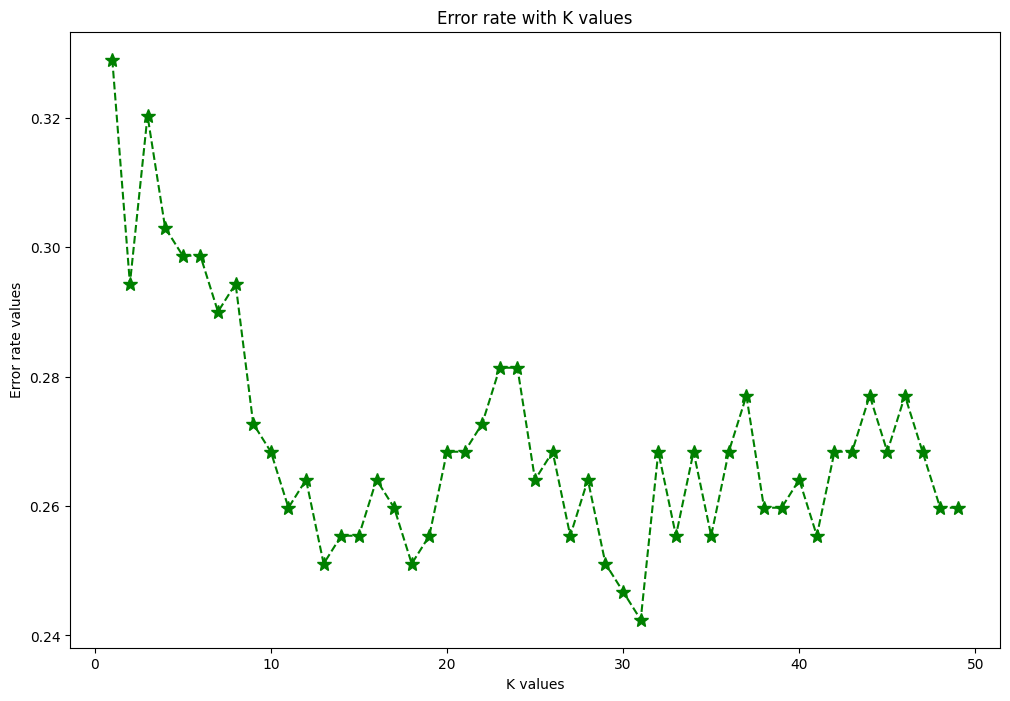

In [15]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [23]:
K = 30
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[134  15]
 [ 42  40]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       149
           1       0.73      0.49      0.58        82

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



STANDARDIZE DATA

In [25]:
data = df.drop(["Outcome"],axis=1).values
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standard_data = (data - mean) / std_dev

standard_df = pd.DataFrame(standard_data, columns=df.drop(["Outcome"], axis = 1).columns)

In [26]:
standard_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638727,0.847055,0.149604,0.907789,-0.693559,0.203622,0.467638,1.424637
1,-0.845829,-1.124361,-0.160381,0.531560,-0.693559,-0.684258,-0.365494,-0.191778
2,1.232549,1.942286,-0.263709,-1.286880,-0.693559,-1.102830,0.603475,-0.106704
3,-0.845829,-0.999192,-0.160381,0.155331,0.122357,-0.493998,-0.920915,-1.042523
4,-1.142741,0.502839,-1.503649,0.907789,0.764674,1.408602,5.481522,-0.021629


In [28]:
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [29]:
sk_features_scaled = scaler.transform(df.drop("Outcome",axis=1))

In [30]:
sk_features_scaled

array([[ 0.63872696,  0.8470548 ,  0.14960376, ...,  0.20362197,
         0.467638  ,  1.42463671],
       [-0.84582934, -1.124361  , -0.16038116, ..., -0.6842578 ,
        -0.36549383, -0.19177802],
       [ 1.23254948,  1.9422858 , -0.26370947, ..., -1.10282969,
         0.60347471, -0.10670356],
       ...,
       [-0.54891808,  0.03345463,  0.04627545, ...,  0.60950986,
        -0.39869836, -0.53207586],
       [ 0.3418157 ,  0.00216231,  0.14960376, ..., -0.73499379,
        -0.68546474, -0.27685248],
       [-0.84582934,  0.15862388, -0.47036608, ..., -0.24031791,
        -0.37153101,  1.16941333]])

In [33]:
df_features_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[:-1])

In [34]:
df_features_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638727,0.847055,0.149604,0.907789,-0.693559,0.203622,0.467638,1.424637
1,-0.845829,-1.124361,-0.160381,0.531560,-0.693559,-0.684258,-0.365494,-0.191778
2,1.232549,1.942286,-0.263709,-1.286880,-0.693559,-1.102830,0.603475,-0.106704
3,-0.845829,-0.999192,-0.160381,0.155331,0.122357,-0.493998,-0.920915,-1.042523
4,-1.142741,0.502839,-1.503649,0.907789,0.764674,1.408602,5.481522,-0.021629


In [35]:
X = df_features_scaled
y = df['Outcome']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
K = 9
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[121  20]
 [ 52  38]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       141
           1       0.66      0.42      0.51        90

    accuracy                           0.69       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.68      0.69      0.67       231



In [41]:
error_rates = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

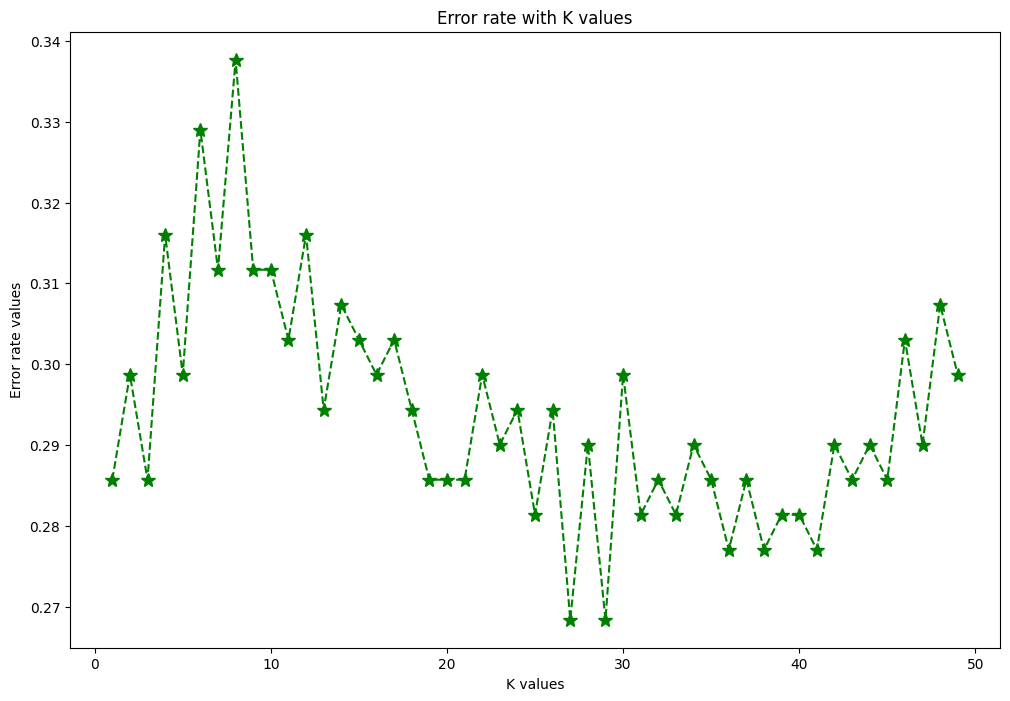

In [42]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [43]:
K = 29
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[130  11]
 [ 51  39]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       141
           1       0.78      0.43      0.56        90

    accuracy                           0.73       231
   macro avg       0.75      0.68      0.68       231
weighted avg       0.74      0.73      0.71       231



This doesn't seem to be a good prediction rate! How can I improve this?